In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Data Preprocessing
In this section, we clean and prepare the dataset for sentiment analysis.

In [6]:
df = pd.read_csv('Combined Data.csv')

In [7]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [13]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [15]:
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [17]:
df.isnull().sum()

statement    362
status         0
dtype: int64

In [19]:
most_frequent = df['statement'].mode()[0]
df['statement'].fillna(most_frequent,inplace=True)

C:\Users\negar\AppData\Local\Temp\ipykernel_900\1921006020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['statement'].fillna(most_frequent,inplace=True)


In [21]:
df.isnull().sum()

statement    0
status       0
dtype: int64

### Exploratory Data Analysis (EDA)
Here, we analyze the dataset to understand its structure and distribution.

C:\Users\negar\AppData\Local\Temp\ipykernel_900\1708889018.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='status',palette='viridis')


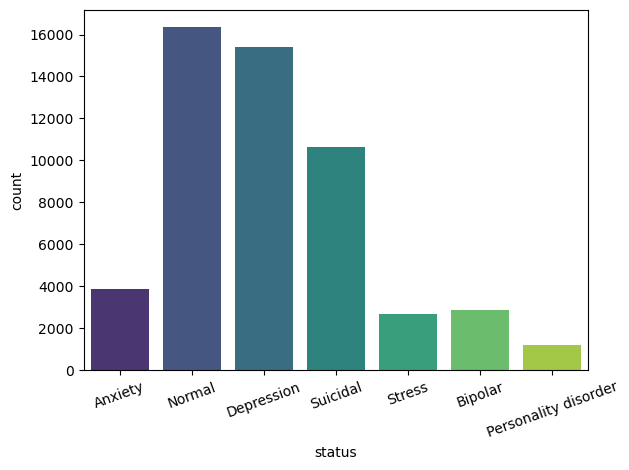

In [24]:
sns.countplot(df, x='status',palette='viridis')
plt.xticks(rotation=20)
plt.tight_layout()

Text(0.5, 1.0, 'Text Length Distribution')

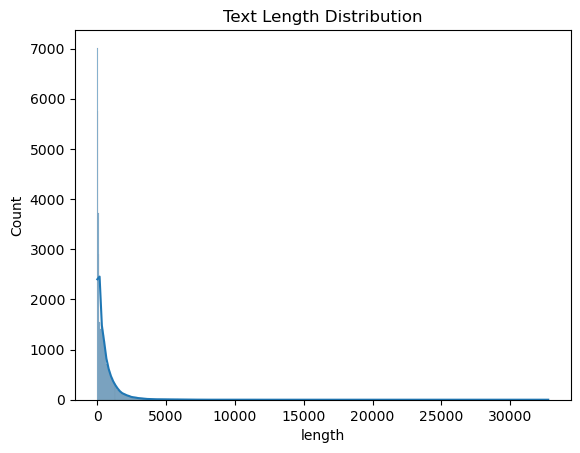

In [26]:
df['length'] = df['statement'].apply(len)
sns.histplot(df['length'], kde=True)
plt.title('Text Length Distribution')

Text(0.5, 1.0, 'Sentiment vs Text Length')

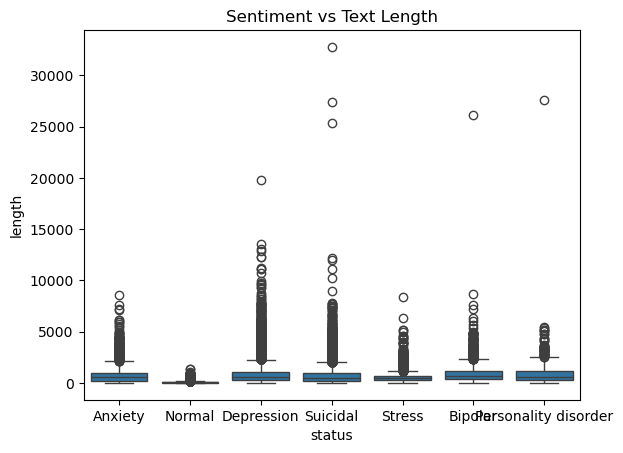

In [28]:
sns.boxplot(x='status', y='length', data=df)
plt.title('Sentiment vs Text Length')

In [30]:
text = " ".join(df['statement'].astype(str))

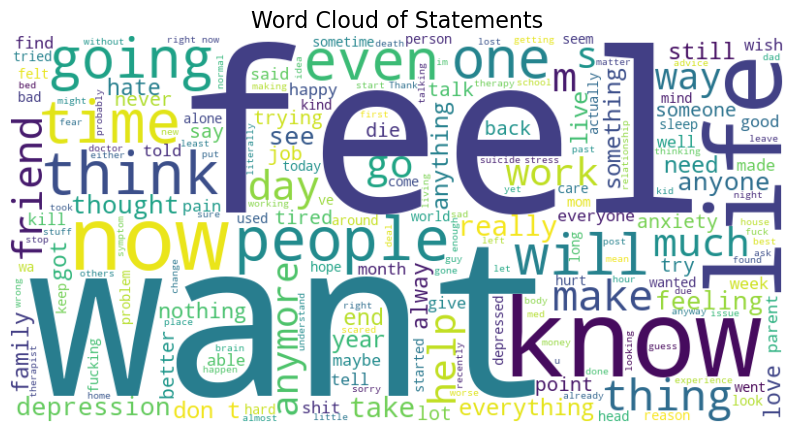

In [66]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Statements', fontsize=16)
plt.show()

### Training Models
In this section, we train various machine learning models for sentiment classification.\
We compare algorithms such as Logistic Regression, Decision Tress, and Neural Networks
performance with metrics like accuracy, precision, recall, and F1-score help evaluate model effectiveness.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
le = LabelEncoder()

In [38]:
df['status'] = le.fit_transform(df['status'])

In [40]:
X = df['statement']
y = df['status']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [44]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

models = [
    LogisticRegression(multi_class='ovr', solver='lbfgs'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    lgb.LGBMClassifier(),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
    
]
results = {}
for model in models:
    model_name = model.__class__.__name__  
    model.fit(X_train_tfidf, y_train)  
    
    y_pred = model.predict(X_test_tfidf)  
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)  
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": class_report
    }
    
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])
    print("-" * 50)  

C:\Users\negar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\negar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\negar\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\negar\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\negar\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.214247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 274287
[LightGBM] [Info] Number of data points in the train set: 37130, number of used features: 4973
[LightGBM] [Info] Start training from score -2.613426
[LightGBM] [Info] Start training from score -2.914302
[LightGBM] [Info] Start training from score -1.236454
[LightGBM] [Info] Start training from score -1.176785
[LightGBM] [Info] Start training from score -3.787589
[LightGBM] [Info] Start training from score -2.989557
[LightGBM] [Info] Start training from score -1.605272
Model: LogisticRegression
Accuracy: 0.7469993087412807
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      1167
           1       0.90      0.61      0.72       863
           2       0.69 